Визуализация решающих поверхностей в kNN.

В этом проекте мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


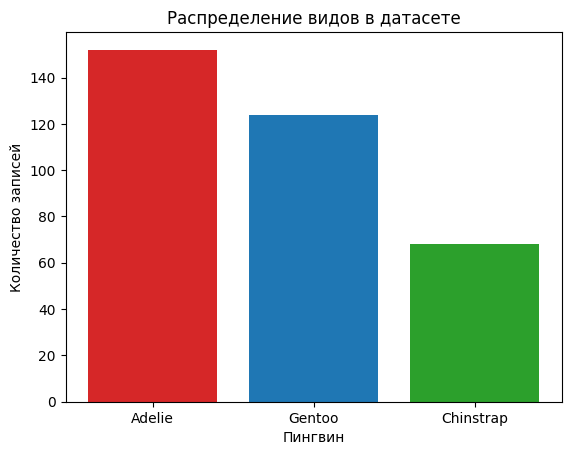

In [41]:
fig, ax = plt.subplots()

species = data['Species'].value_counts().reset_index()
counts = [40, 100, 30, 55]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(species['Species'], species['count'], color=bar_colors)

ax.set_ylabel('Количество записей')
ax.set_title('Распределение видов в датасете')
ax.set_xlabel('Пингвин')

plt.show()

На графике видно распределение пингвинов в датасете. Можно заметить что наименьшее количество наблюдений за видом "Chinstrap". Это нужно учитывать в последующем разделении выборки для обучения и тестирования, иначе может быть такое, модель при обучении не будет знать о виде "Chinstrap", либо будет недостаточно информации для полноценного обучения.

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
data = data.dropna()
lbl_sex = LabelEncoder()
data['Sex'] = lbl_sex.fit_transform(data['Sex'])
lbl_cl = LabelEncoder()
data['Clutch Completion'] = lbl_cl.fit_transform(data['Clutch Completion'])
data = pd.get_dummies(data, columns=['Island'], prefix=['Island'])

category = ['Chinstrap', 'Gentoo', 'Adelie']
ore = OrdinalEncoder(categories=[category])
data['Species'] = ore.fit_transform(data[['Species']])
data.head(10)

<ipython-input-4-8e914b3e190f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = lbl_sex.fit_transform(data['Sex'])
<ipython-input-4-8e914b3e190f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clutch Completion'] = lbl_cl.fit_transform(data['Clutch Completion'])


,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,0.0,1,382,50.9,19.1,196.0,3550.0,2,10.02372,-24.86594,False,True,False
1,0.0,1,741,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433,False,True,False
2,1.0,1,744,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829,True,False,False
3,0.0,1,10,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984,False,True,False
4,1.0,1,13,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971,True,False,False
5,1.0,1,22,48.1,15.1,209.0,5500.0,2,8.45738,-26.22664,True,False,False
6,1.0,1,13,51.1,16.5,225.0,5250.0,2,8.20660,-26.36863,True,False,False
7,1.0,0,392,42.7,13.7,208.0,3950.0,1,8.14567,-26.59467,True,False,False
8,2.0,1,14,39.6,20.7,191.0,3900.0,1,8.80967,-26.78958,True,False,False
9,1.0,1,735,46.1,13.2,211.0,4500.0,1,7.99300,-25.51390,True,False,False


Признаки 'Sex' , 'Clutch Completion' - бинарные поэтому можно применить LabelEncoder который заменит их на числа (0,1,2), с признаком 'Island' сложнее так как его не получится просто заменить на числа поэтому используем OneHotEncoder для того чтобы избежать ложного порядка между островами

Целевая категориальная переменная закодированна в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2.

In [ ]:
X = data.drop('Species', axis=1)
Y = data['Species']

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(2004)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y)



Stratify при делении на тренировочные и тестовые важно использовать так как данные могут быть разделены случайно, и, например, один из классов может оказаться полностью в тренировочной выборке, а другой — в тестовой.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
x_train = X_train[['Flipper Length (mm)' , 'Body Mass (g)']]
x_test = X_test[['Flipper Length (mm)' , 'Body Mass (g)']]

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

k_list = [1,3,5,10,15,25]
acc_test = {}
acc_train = {}
show = pd.DataFrame()
show['NN'] = k_list
knn_models = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(x_train, Y_train)
  knn_models.append(knn)
  y_pred_test = knn.predict(x_test)
  y_pred_train = knn.predict(x_train)
  acc_test[k] = round(metrics.accuracy_score(Y_test, y_pred_test), 2)
  acc_train[k] = round(metrics.accuracy_score(Y_train, y_pred_train), 2)

show['Train'] = acc_train.values()
show['Test'] = acc_test.values()
show

,NN,Train,Test
0,1,0.98,0.76
1,3,0.89,0.80
2,5,0.85,0.79
3,10,0.83,0.82
4,15,0.81,0.83
5,25,0.81,0.84


При К = 1 на тренировочной выборке значение = 0.98 а на тестовой 0.76 -- очень большая разница говорит о переобучении модели

На тренировочной выборке обучается шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей равно 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения используется только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние.

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend

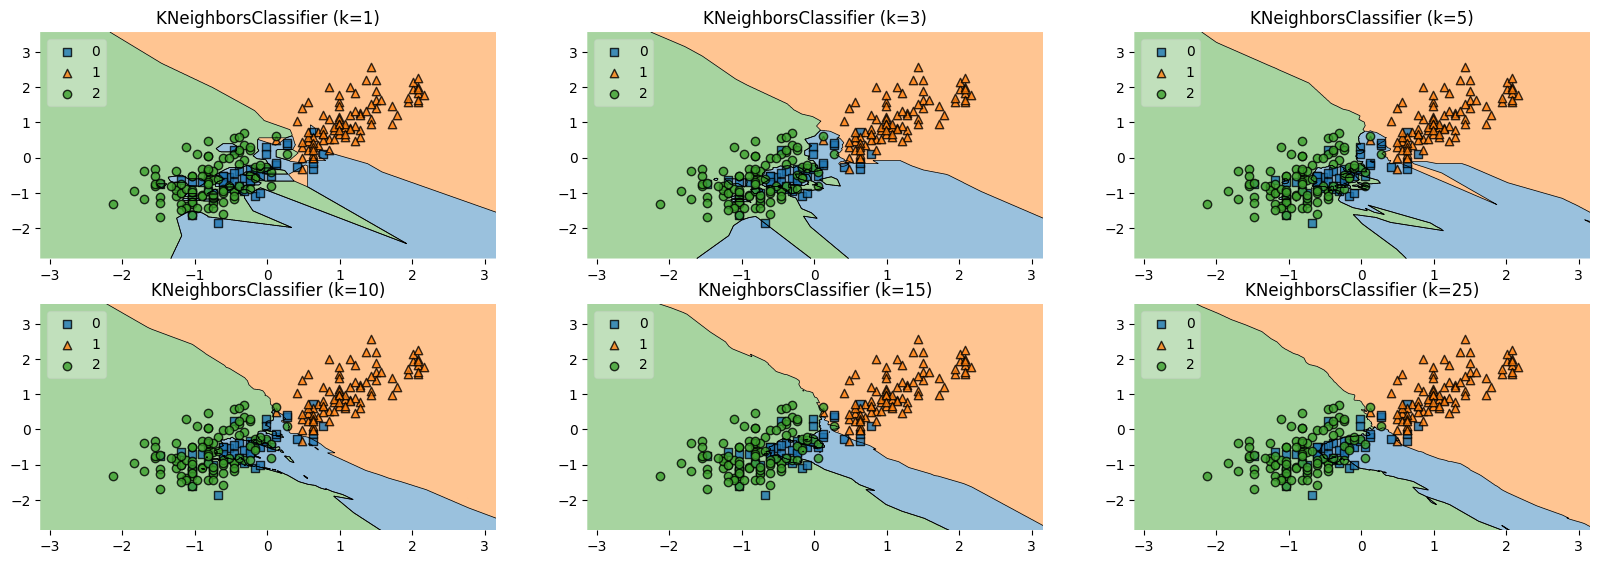

In [ ]:
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(20,10))

y = Y_train.to_numpy(dtype=int)
labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)', 'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']
for clf, lab, grd in zip(knn_models,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(x_train, Y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

Оптимальным числом соседей является к=25 так как значения на тренировочной и тестовой выборках не значительно отличаются и границы сглажены, у к=15 так же маленькая разница и гладкие границы но возможно на большем количестве данных точность упадет поэтому к=25 оптимально.
О переобучении явно говорят результаты к=1 так как у графика очень сложные границы в общем классификатор слишком точно подстраивается под тренировочные данные
А в заключении можно сказать что при увеличении К модель начинает более точно определять таргет это хорошо видно на графиках так как границы становятся все ровнее


### KNN своими руками.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.X = []
        self.y = []

    def fit(self, X, y):

      self.X = X
      self.y = y



    def predict(self, X):
        y_pred = np.array([])
        for el in X:
            dist = np.array([])
            for s_el in self.X:
                dist= np.append(dist, self.count_distance(el, s_el))
            sort = np.argsort(dist)
            pred = self.y[sort]
            k_neigh = pred[:self.k]
            c = Counter(k_neigh)
            y_pred = np.append(y_pred, c.most_common(1)[0][0])


        return y_pred



    def count_distance(self, x, y):
        dist = 0
        for i in range(len(x)):
            el = (x[i] - y[i]) ** 2
            dist += el
        return np.sqrt(dist)



In [ ]:

y_train = Y_train.to_numpy()
acc = {}
for k in [1, 3, 5, 10, 15, 25]:
  knn = KNN(k)
  knn.fit(x_train, y_train)
  ans = knn.predict(x_test)
  y_test = Y_test.to_numpy()
  acc[k] = (round(metrics.accuracy_score(y_test, ans), 2))

print('Лучшая точность:', max(acc.values()), "при К =", [ k for k in acc.keys() if acc.get(k) ==  max(acc.values()) ][0] )


Лучшая точность: 0.84 при К = 25
